In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
import pandas as pd

In [5]:
L = 10
EPSILON = 0.1
TAILLE_ECHANTILLON = 20

def objectif(x):
    return np.exp(-x / 10) * np.sin(np.pi * x)

XE = np.linspace(0, L, TAILLE_ECHANTILLON)
YE = objectif(XE) + EPSILON * np.random.randn(TAILLE_ECHANTILLON)

In [13]:
XE.reshape(-1, 1)

array([[ 0.        ],
       [ 0.52631579],
       [ 1.05263158],
       [ 1.57894737],
       [ 2.10526316],
       [ 2.63157895],
       [ 3.15789474],
       [ 3.68421053],
       [ 4.21052632],
       [ 4.73684211],
       [ 5.26315789],
       [ 5.78947368],
       [ 6.31578947],
       [ 6.84210526],
       [ 7.36842105],
       [ 7.89473684],
       [ 8.42105263],
       [ 8.94736842],
       [ 9.47368421],
       [10.        ]])

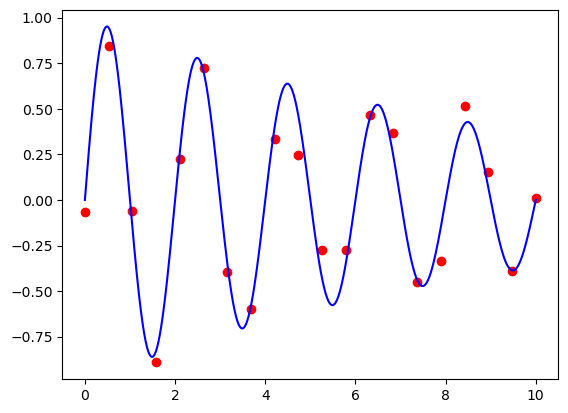

In [6]:
xs = np.linspace(0, L, 1000)
ys = objectif(xs)
plt.plot(xs, ys, color="blue")
plt.scatter(XE, YE, color="red")

# Prise en main de scikit-learn

## Régression linéaire

In [2]:
import sklearn.linear_model as lm

In [7]:
lin = lm.LinearRegression()

In [10]:
lin.fit(X=XE.reshape(-1, 1), y=YE)

LinearRegression()

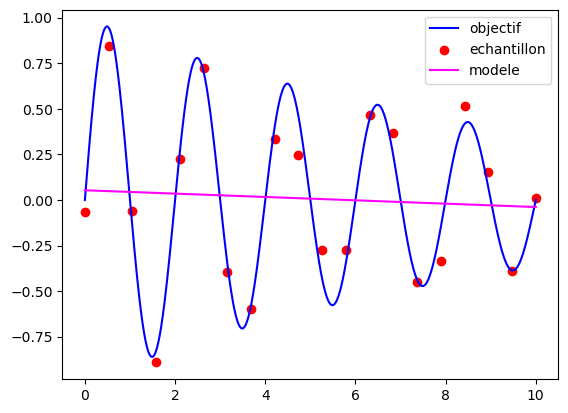

In [11]:
xs = np.linspace(0, L, 1000)
ys = objectif(xs)
plt.plot(xs, ys, color="blue", label="objectif")
plt.scatter(XE, YE, color="red", label="echantillon")
plt.plot(xs, lin.predict(xs.reshape(-1, 1)), color="magenta", label="modele")
plt.legend()

In [12]:
lin.score(XE.reshape(-1, 1), YE)

0.003858908444790643

**REMARQUE**
Par rapport aux modèles qu'on a construit à la main:
- `apprend` devient `fit`
- `__call__` devient `predict`
- `erreur` devient `score`

De plus, `fit`, `predict` et `score` attendent des tableaux 2d comme inputs, d'où l'utilisation de `reshape` ci-dessus.

Le score va de $-\infty$ à $1$, $1$ correspondant à un modèle qui reproduit parfaitement la sortie à partir de l'entrée, tandis que  $0$ correspond à un modèle qui prédit tout le temps la valeur moyenne de la sortie.

## Exercice

Trouver comment faire un découpage de l'échantillon entre partie de contrôle et partie d'apprentissage via l'aide de *scikit-learn*.

In [14]:
import sklearn.model_selection as ms

In [23]:
Xa, Xc, ya, yc = ms.train_test_split(XE.reshape(-1, 1), YE, test_size=0.2)

In [24]:
lin.fit(Xa, ya)

LinearRegression()

In [25]:
lin.score(Xa, ya)

0.026385453523463887

In [26]:
lin.score(Xc, yc)

-0.15163147477345662

## Exercice

Utiliser `sklearn.neighbors.KNeighborsRegressor` pour faire la même tâche. 

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
nb_voisins = [n for n in range(2, 10)]
choix_poids = ["uniform", "distance"]
for poids in choix_poids:
    for nb_voisin in nb_voisins:
        knr = KNeighborsRegressor(n_neighbors=nb_voisin, weights=poids)
        knr.fit(Xa, ya)
        print(f"{nb_voisin=}, {poids=}, sa={knr.score(Xa, ya):.02f}, sc={knr.score(Xc, yc):.02f}")

nb_voisin=2, poids='uniform', sa=0.53, sc=-0.32
nb_voisin=3, poids='uniform', sa=0.32, sc=-0.99
nb_voisin=4, poids='uniform', sa=-0.05, sc=-1.23
nb_voisin=5, poids='uniform', sa=-0.02, sc=-0.99
nb_voisin=6, poids='uniform', sa=0.11, sc=-0.59
nb_voisin=7, poids='uniform', sa=0.18, sc=-0.25
nb_voisin=8, poids='uniform', sa=0.17, sc=-0.21
nb_voisin=9, poids='uniform', sa=0.04, sc=-0.24
nb_voisin=2, poids='distance', sa=1.00, sc=-0.32
nb_voisin=3, poids='distance', sa=1.00, sc=-0.71
nb_voisin=4, poids='distance', sa=1.00, sc=-0.92
nb_voisin=5, poids='distance', sa=1.00, sc=-0.83
nb_voisin=6, poids='distance', sa=1.00, sc=-0.63
nb_voisin=7, poids='distance', sa=1.00, sc=-0.47
nb_voisin=8, poids='distance', sa=1.00, sc=-0.44
nb_voisin=9, poids='distance', sa=1.00, sc=-0.45


**REMARQUE** on voit qu'on a des nettements meilleurs scores sur la partie apprentissage qu'avec la régression linéaire. Le score sur la partie contrôle est par contre tout aussi mauvais.

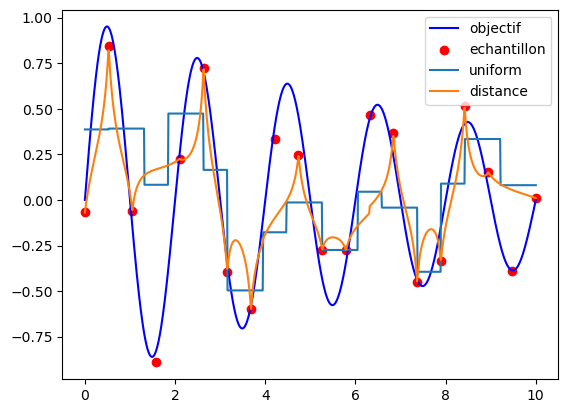

In [41]:
xs = np.linspace(0, L, 1000)
ys = objectif(xs)
plt.plot(xs, ys, color="blue", label="objectif")
plt.scatter(XE, YE, color="red", label="echantillon")
knr = KNeighborsRegressor(n_neighbors=2, weights="uniform")
knr.fit(Xa, ya)
plt.plot(xs, knr.predict(xs.reshape(-1, 1)), label="uniform")
knr = KNeighborsRegressor(n_neighbors=8, weights="distance")
knr.fit(Xa, ya)
plt.plot(xs, knr.predict(xs.reshape(-1, 1)), label="distance")
plt.legend()

**CONCLUSION** vu l'échantillonage il est naturel que le modèle n'arrive pas à généraliser.

## Ajustement échantillon

In [50]:
n_e = 100
XE = np.random.uniform(0, L, size=(n_e, 1))
YE = objectif(XE).reshape(-1) + 0.1 * np.random.randn(n_e)


In [51]:
Xa, Xc, ya, yc = ms.train_test_split(XE, YE, test_size=0.2)

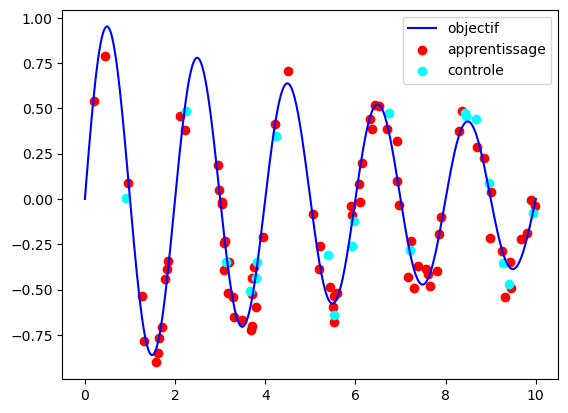

In [52]:
xs = np.linspace(0, L, 1000)
ys = objectif(xs)
plt.plot(xs, ys, color="blue", label="objectif")
plt.scatter(Xa.reshape(-1), ya, color="red", label="apprentissage")
plt.scatter(Xc.reshape(-1), yc, color="cyan", label="controle")
plt.legend()

In [53]:
nb_voisins = [n for n in range(2, 10)]
choix_poids = ["uniform", "distance"]
for poids in choix_poids:
    for nb_voisin in nb_voisins:
        knr = KNeighborsRegressor(n_neighbors=nb_voisin, weights=poids)
        knr.fit(Xa, ya)
        print(f"{nb_voisin=}, {poids=}, sa={knr.score(Xa, ya):.02f}, sc={knr.score(Xc, yc):.02f}")

nb_voisin=2, poids='uniform', sa=0.95, sc=0.87
nb_voisin=3, poids='uniform', sa=0.90, sc=0.77
nb_voisin=4, poids='uniform', sa=0.85, sc=0.75
nb_voisin=5, poids='uniform', sa=0.75, sc=0.66
nb_voisin=6, poids='uniform', sa=0.65, sc=0.58
nb_voisin=7, poids='uniform', sa=0.56, sc=0.47
nb_voisin=8, poids='uniform', sa=0.51, sc=0.34
nb_voisin=9, poids='uniform', sa=0.45, sc=0.26
nb_voisin=2, poids='distance', sa=1.00, sc=0.90
nb_voisin=3, poids='distance', sa=1.00, sc=0.90
nb_voisin=4, poids='distance', sa=1.00, sc=0.89
nb_voisin=5, poids='distance', sa=1.00, sc=0.89
nb_voisin=6, poids='distance', sa=1.00, sc=0.88
nb_voisin=7, poids='distance', sa=1.00, sc=0.87
nb_voisin=8, poids='distance', sa=1.00, sc=0.85
nb_voisin=9, poids='distance', sa=1.00, sc=0.84


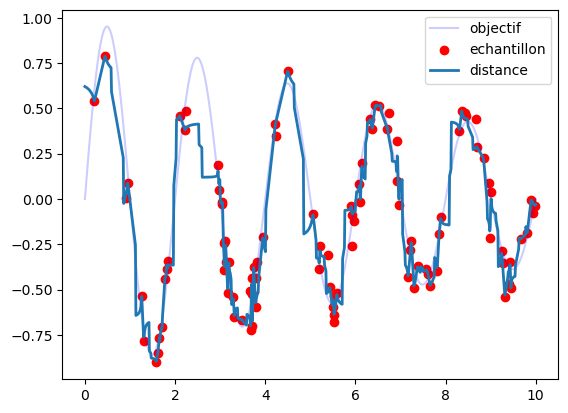

In [57]:
xs = np.linspace(0, L, 1000)
ys = objectif(xs)
plt.plot(xs, ys, color="blue", label="objectif", alpha=0.2)
plt.scatter(XE, YE, color="red", label="echantillon")
knr = KNeighborsRegressor(n_neighbors=2, weights="distance")
knr.fit(Xa, ya)
plt.plot(xs, knr.predict(xs.reshape(-1, 1)), lw=2, label="distance")
plt.legend()

## Exercice

Adapter la démarche pour le modèle `sklearn.ensemble.GradientBoostingRegressor`

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
resultats = list()
for n in (50, 100, 150):
    for lr in (0.01, 0.1, 1.):
        gbr = GradientBoostingRegressor(n_estimators=n, learning_rate=lr)
        gbr.fit(Xa, ya)
        resultats.append([n, lr, gbr.score(Xa, ya), gbr.score(Xc, yc)])
        
table = pd.DataFrame(data=resultats, columns=["n", "lr", "sa", "sc"])
table

,n,lr,sa,sc
0,50,0.01,0.269961,0.009357
1,50,0.10,0.918205,0.843038
2,50,1.00,1.000000,0.858254
3,100,0.01,0.465805,0.170047
4,100,0.10,0.978964,0.908685
5,100,1.00,1.000000,0.858254
6,150,0.01,0.597173,0.347257
7,150,0.10,0.992352,0.895341
8,150,1.00,1.000000,0.858254


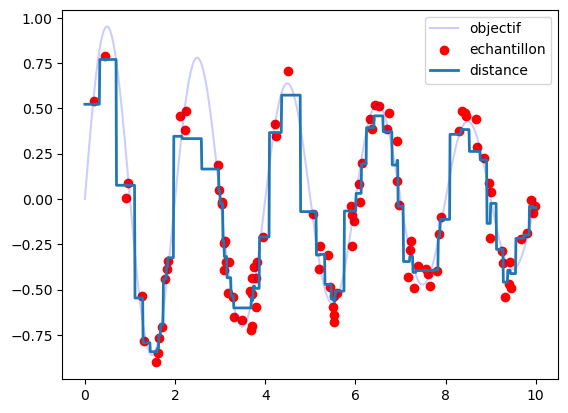

In [76]:
xs = np.linspace(0, L, 1000)
ys = objectif(xs)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gbr.fit(Xa, ya)
plt.plot(xs, ys, color="blue", label="objectif", alpha=0.2)
plt.scatter(XE, YE, color="red", label="echantillon")
plt.plot(xs, gbr.predict(xs.reshape(-1, 1)), lw=2, label="distance")
plt.legend()

## Exercice

Utiliser `sklearn.model_selection.cross_val_score` pour sélectionner le meilleur modèle parmi les précédents, puis vérifier si ce modèle est en surapprentissage.

In [83]:
resultats = list()

for poids in ["uniform", "distance"]:
    for nb_voisin in range(2, 10):
        knr = KNeighborsRegressor(n_neighbors=nb_voisin, weights=poids)
        resultats.append([poids, nb_voisin, ms.cross_val_score(knr, Xa, ya, cv=5).mean()])
        
tablekn = pd.DataFrame(data=resultats, columns=("weights", "n_neighbors", "score de cross validation"))
tablekn.sort_values(by="score de cross validation")

,weights,n_neighbors,score de cross validation
7,uniform,9,0.192585
6,uniform,8,0.243663
5,uniform,7,0.318193
4,uniform,6,0.383843
3,uniform,5,0.454111
2,uniform,4,0.575165
15,distance,9,0.581820
14,distance,8,0.597698
13,distance,7,0.628812
12,distance,6,0.660685


In [90]:
%%time
resultats = list()
for n in range(50, 150, 5):
    for lr in np.linspace(0.05, 0.15, 20):
        gbr = GradientBoostingRegressor(n_estimators=n, learning_rate=lr)

        resultats.append([n, lr, ms.cross_val_score(gbr, Xa, ya, cv=5).mean()])
        
tablegbr = pd.DataFrame(
    data=resultats, 
    columns=["n_estimators", "learning_rate", "score de cross validation"]
)
tablegbr.sort_values(by="score de cross validation")

CPU times: total: 1min 10s
Wall time: 1min 10s


,n_estimators,learning_rate,score de cross validation
0,50,0.050000,0.552430
1,50,0.055263,0.576870
20,55,0.050000,0.579194
2,50,0.060526,0.595989
21,55,0.055263,0.596775
...,...,...,...
58,60,0.144737,0.748182
57,60,0.139474,0.748352
38,55,0.144737,0.749510
96,70,0.134211,0.749925


In [84]:
meilleur = KNeighborsRegressor(n_neighbors=3, weights="distance")

In [85]:
meilleur.fit(Xa, ya)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [86]:
meilleur.score(Xa, ya)

1.0

In [87]:
meilleur.score(Xc, yc)

0.8980207742498405

Le meilleur ne semble pas en surapprentissage, on pourra l'utiliser en production.

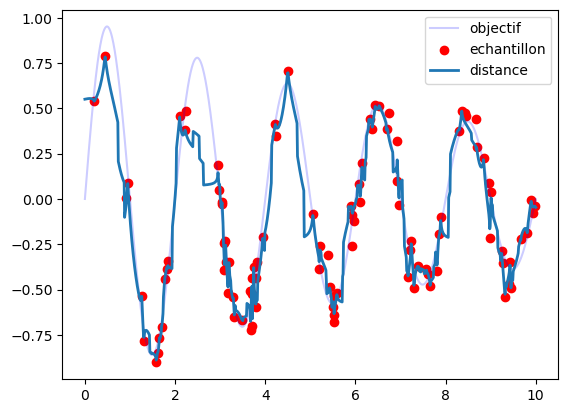

In [88]:
xs = np.linspace(0, L, 1000)
ys = objectif(xs)
plt.plot(xs, ys, color="blue", label="objectif", alpha=0.2)
plt.scatter(XE, YE, color="red", label="echantillon")
plt.plot(xs, meilleur.predict(xs.reshape(-1, 1)), lw=2, label="distance")
plt.legend()

In [89]:
meilleur.score(xs.reshape(-1, 1), ys)

0.8654528676434943